In [4]:
# used libraries

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# the Layer class definition

class NeuralNetLayer:
  """
  A simple neural network layer.
  
  Parameters:
      - A_prev: the array activation of previous layer of shape (n_previous_units, n_examples)
      - num_units: integer of current layer units.
      - activation: string specifies the type of current layer activation.
  """



  def __init__(self, A_prev , num_units, activation='relu'):
    """
    Initializing weights and necessary parameters.
    Note: weights are intialized randomly and biases are initialized to zero.
    """
    self.activation = activation
    self.weights = np.random.rand(num_units, A_prev.shape[0])
    self.biases = np.zeros((num_units,1))
    self.batch_size = A_prev.shape[1]


    
  def predict(self, A_prev):
    """
    Forward propagation through the layer.
    
    Parameters:
        - A_prev: array of input to the current layer, shape (n_previous_units, n_examples) 
        
    Returns:
        - array of the current layer activation, shape (n_current_units, n_examples) 
    """
    self.A_previous = A_prev
    self.z = np.dot(self.weights, self.A_previous) + self.biases

    if self.activation == 'sigmoid':
      self.a =  1 / (1 + np.exp(-self.z))

    elif self.activation == 'relu':
      self.a = np.maximum(0.0, self.z)

    return self.a
    
    

  def _layer_backward(self, A_prev , dloss_dAnext):
    """
    Backward propagation through the layer.
    
    Parameters:
        - A_prev: array of input from the previous layer to the current layer, shape (n_previous_units, n_examples) 
        - dloss_dAnext: array of derivatives of loss with respect to the input of the next layer in forward propagation, shape(n_current_units, n_examples)
    Returns:
        - dloss_dw: array of derivative of the loss with respect to current weights, shape (n_current_units, n_previous_unitsb
        - dloss_db: array of derivative of the loss with respect to current biases , shape (n_current_units,1) 
        - dloss_dAprev: array of derivative of the loss with respect to the input to the current layer from the previous layer, shape (n_previous_units, n_examples)
    """
    self.A_prev = A_prev
    self.dloss_da = dloss_dAnext

    self.z = np.dot(self.weights, self.A_prev) + self.biases

    if self.activation == 'sigmoid':
      self.a =  1 / (1 + np.exp(-self.z))
      self.da_dz = self.a * (1 - self.a)

    elif self.activation == 'relu':
      self.a = np.maximum(0, self.z)
      self.da_dz = np.where( self.a > 0, 1, 0)  # return np.where(condition, x, y) x or y based on the condition.


    self.dloss_dz = self.dloss_da * self.da_dz
    
    self.dloss_dw = np.dot(self.dloss_dz, self.A_prev.T)            /  self.batch_size   # divide by the batch size to average the values
    self.dloss_db = np.sum(self.dloss_dz, axis=1, keepdims=True)    /  self.batch_size   # divide by the batch size to average the values
    
    self.dloss_dAprev = np.dot(self.weights.T, self.dloss_dz)   # this is used later to help in chain rule usage.

    return self.dloss_dw, self.dloss_db, self.dloss_dAprev



  def _update_params(self, dloss_dw, dloss_db, learning_rate=0.01):
    """
    Applying gradient descent to update the weights and biases of the current layer.
    
    Parameters:
        - dloss_dw: array of derivative of the loss with respect to current weights, shape (n_current_units, n_previous_unitsb
        - dloss_db: array of derivative of the loss with respect to current biases , shape (n_current_units,1) 
        - learning_rate: float number for the learning rate.
    """
    self.lr = learning_rate
    self.weights -= dloss_dw * self.lr
    self.biases  -= dloss_db * self.lr

In [7]:
def NeuralNetwork( input, target, num_iterations):
    """
    1. Train a full NeuralNetwork with many combined layers with both forward and backward propagation.
    2. Display the cost versus number of epochs to monitor training.

    Parameters:
        - input: array of input to the neural network
        - target: array of targets (here in the example we worked on a supervised-learning task).
        - num_iterations: integer number of epochs to do training
    """
    N1 = NeuralNetLayer(input,  4, activation='relu')
    A_1 = N1.predict(input)
    N2 = NeuralNetLayer(A_1, 1, activation='sigmoid')

    costs = []
    for i in range(num_iterations):
        a1 = N1.predict(input)
        a2 = N2.predict(a1)

        cost  = ( -np.dot( target , np.log(a2).T) -np.dot( (1-target), np.log(1-a2).T )    )   /  input.shape[1]

        dloss_da2  = a2 - target      # this is a short-hand derivative of the cross entropy loss after doing the math.

        dloss_dw2, dloss_db2, dloss_dAprev2 = N2._layer_backward(a1, dloss_da2)
        dloss_dw1, dloss_db1, dloss_dAprev1 = N1._layer_backward(input, dloss_dAprev2)

        N2._update_params(dloss_dw2, dloss_db2, learning_rate=0.01)
        N1._update_params(dloss_dw1, dloss_db1, learning_rate=0.01)

        costs.append(cost.squeeze())

    plt.plot(np.arange(num_iterations), costs)
    plt.xlabel("num_epochs")
    plt.ylabel("cross_entropy loss")
    plt.title(f"loss Vs num_epochs at learning_rate={N1.lr}")
    plt.show()

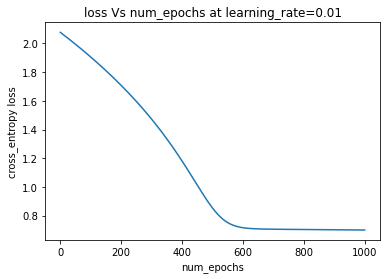

In [12]:
# dummy test with dummy data:

input_vectors = np.array([[3. , 2. , 4. , 3. , 3.5, 2. , 5.5, 1. ],
                          [1.5, 1. , 1.5, 4. , 0.5, 0.5, 1. , 1. ]])

targets = np.expand_dims(np.array([0, 1, 0, 1, 0, 1, 1, 0]), axis=0)

NeuralNetwork(input_vectors, targets, 1000)